In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import pandas as pd
sp = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
sp.shape

(1000, 8)

In [4]:
sp.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
sp.duplicated().sum()

0

In [7]:
categorical = sp.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, sp[col].nunique()))
    
print('\n-------------\n')

for col in categorical:
    print('{} : {}'.format(col, ', '.join(sp[col].unique())))

gender : 2 unique value(s)
race/ethnicity : 5 unique value(s)
parental level of education : 6 unique value(s)
lunch : 2 unique value(s)
test preparation course : 2 unique value(s)

-------------

gender : female, male
race/ethnicity : group B, group C, group A, group D, group E
parental level of education : bachelor's degree, some college, master's degree, associate's degree, high school, some high school
lunch : standard, free/reduced
test preparation course : none, completed


In [8]:
score = ((sp['math score'] + sp['reading score'] + sp['writing score']) / 300) * 100
sp['percentage'] = score
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
def Grade(percentage):
    if (percentage >= 95):return 'A'
    if (percentage >= 80):return 'B'
    if (percentage >= 65):return 'C'
    if (percentage >= 50):return 'D'
    if (percentage >= 35):return 'E'
    else: return 'F'
    
sp["grade"] = sp.apply(lambda x : Grade(x["percentage"]), axis=1)
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,B
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,C
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,B
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,74.333333,C


In [10]:
a = sp.groupby('race/ethnicity') ['gender'].value_counts()
a

race/ethnicity  gender
group A         male       53
                female     36
group B         female    104
                male       86
group C         female    180
                male      139
group D         male      133
                female    129
group E         male       71
                female     69
Name: gender, dtype: int64

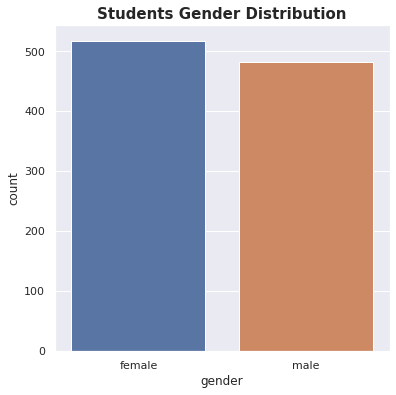

total male students: 482
total female students: 518


In [11]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,6))
sns.countplot(data=sp, x='gender')
plt.title('Students Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

print('total male students: {}'.format(len(sp[sp.gender == 'male'])))
print('total female students: {}'.format(len(sp[sp.gender == 'female'])))

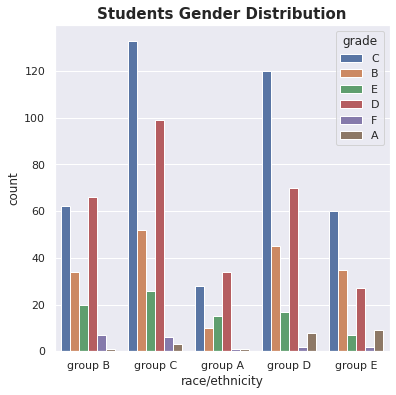

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=sp, x='race/ethnicity', hue='grade')
plt.title('Students Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

<AxesSubplot:xlabel='race/ethnicity', ylabel='percentage'>

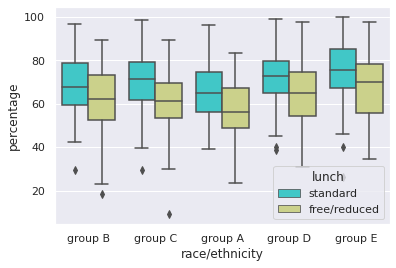

In [13]:
sns.boxplot(x="race/ethnicity", y="percentage", data=sp, palette='rainbow', hue='lunch')

<function matplotlib.pyplot.show(close=None, block=None)>

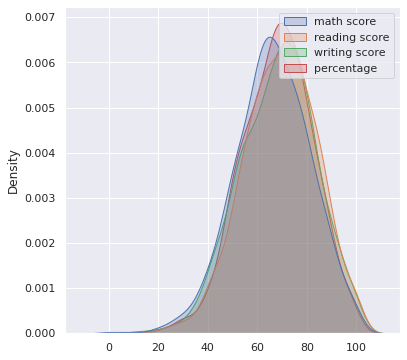

In [14]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data=sp, shade=True)
plt.show

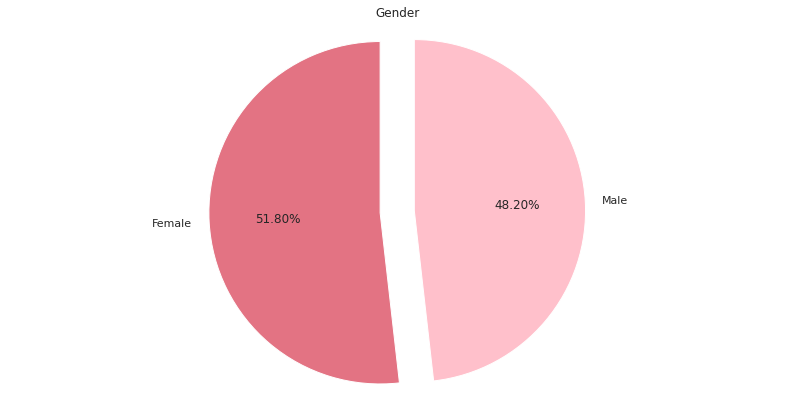

In [15]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(sp['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

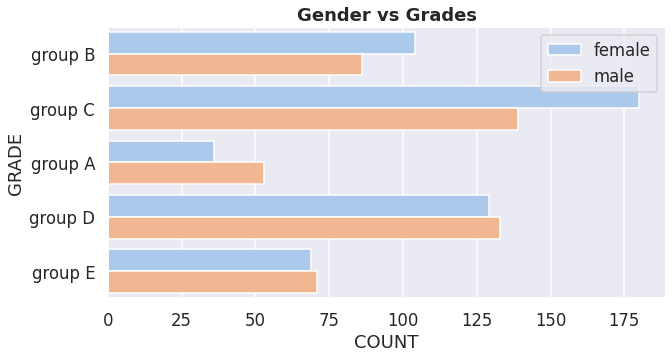

In [16]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="race/ethnicity", hue="gender", data=sp)
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

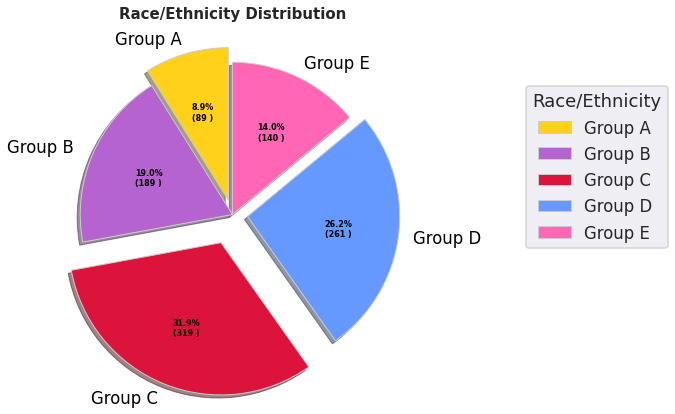

In [17]:
import numpy as np
race = ['Group A', 'Group B ', 'Group C',  
        'Group D', 'Group E'] 
  
data = [89, 190, 319, 262, 140] 
  
  
# Creating explode data 
explode = ( 0.1, 0,0.2, 0.1, 0) 
  
# Creating color parameters 
colors = (  "#ffd11a", "#b463cf", 
          "#DC143C", "#6699ff", "#ff66b3" ) 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = race, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="#000000")) 
  
# Adding legend 
ax.legend(wedges, race, 
          title ="Race/Ethnicity", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 0, 1.25)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold') 
  
# show plot 
plt.show()

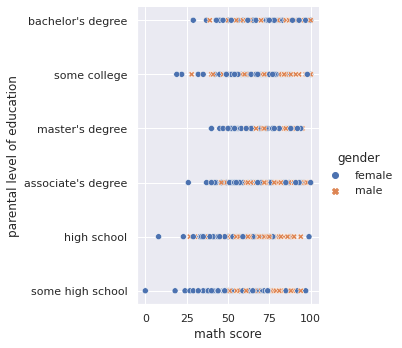

In [18]:
import seaborn as sns
sns.set_theme()
# Create a visualization
sns.relplot(data=sp, x="math score", y="parental level of education", hue="gender", style='gender')

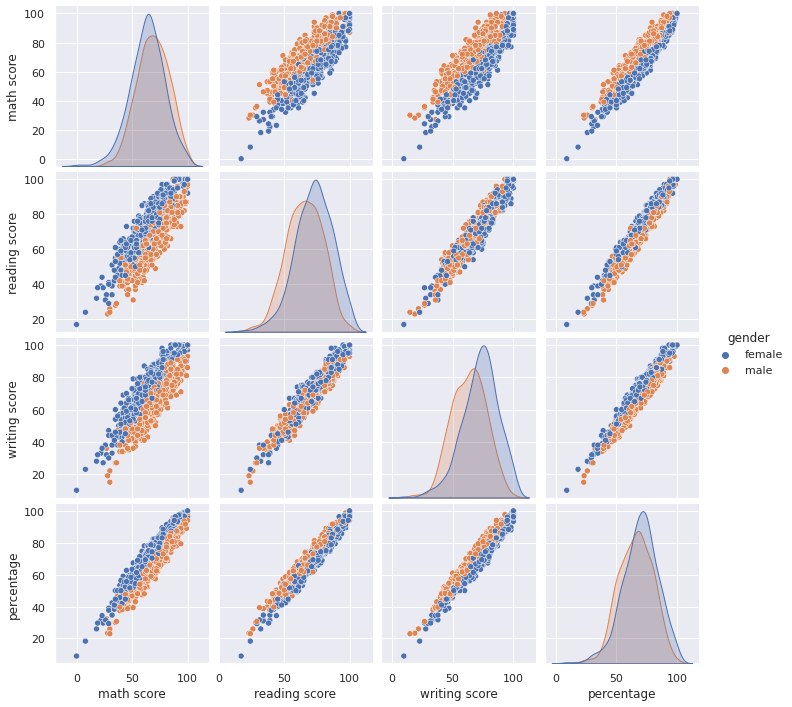

In [19]:
sns.pairplot(data=sp, hue='gender')

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

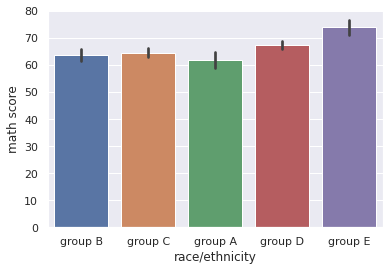

In [20]:
sns.barplot(x='race/ethnicity', y='math score', data=sp)

**i will update this notebook soon... if you like this please upvote**